In [348]:
using Plots
using StatsPlots
using CSV
using DataFrames
using Query
using CategoricalArrays

In [233]:
path = "C:/Users/jfl-1/Downloads/ep1/EP1_MAC219-main/"
function load_csv(path)
    df = DataFrame(CSV.File(path*"all_files.csv"))
    return df
end

load_csv (generic function with 1 method)

In [378]:
function confidence_interval(std)
    # N = 10
    return std/sqrt(10)*1.96
end


confidence_interval (generic function with 2 methods)

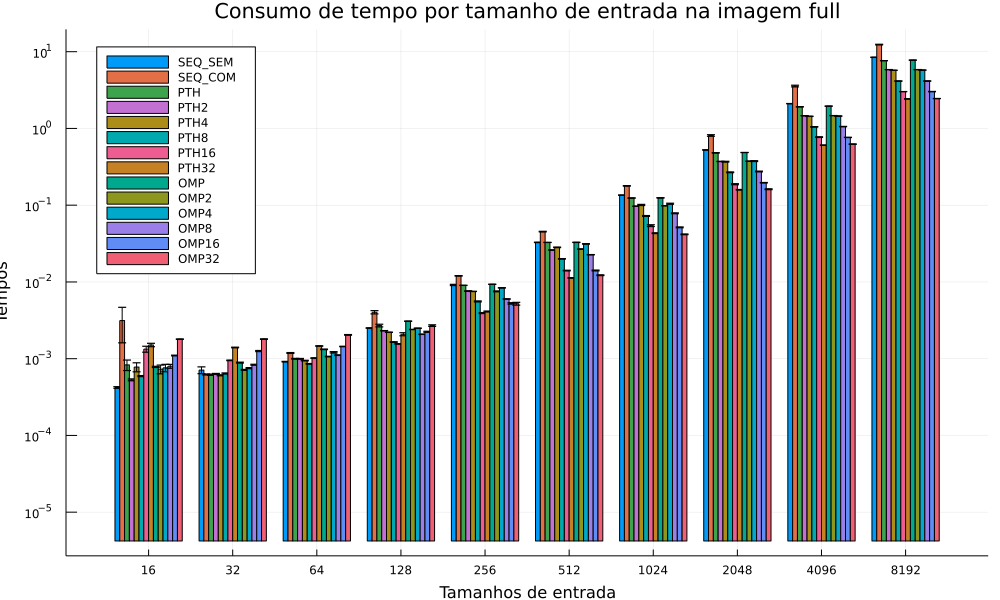

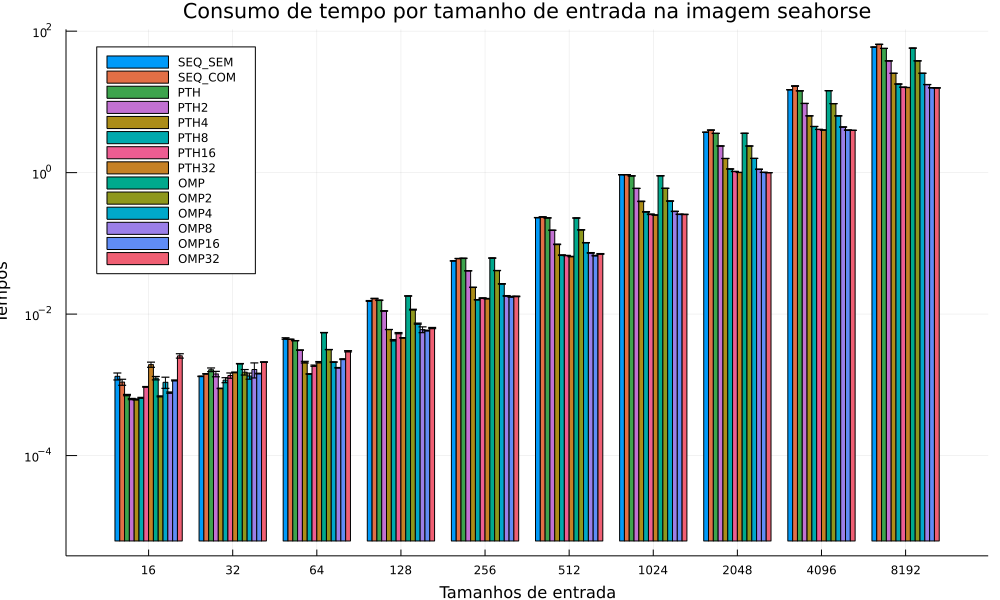

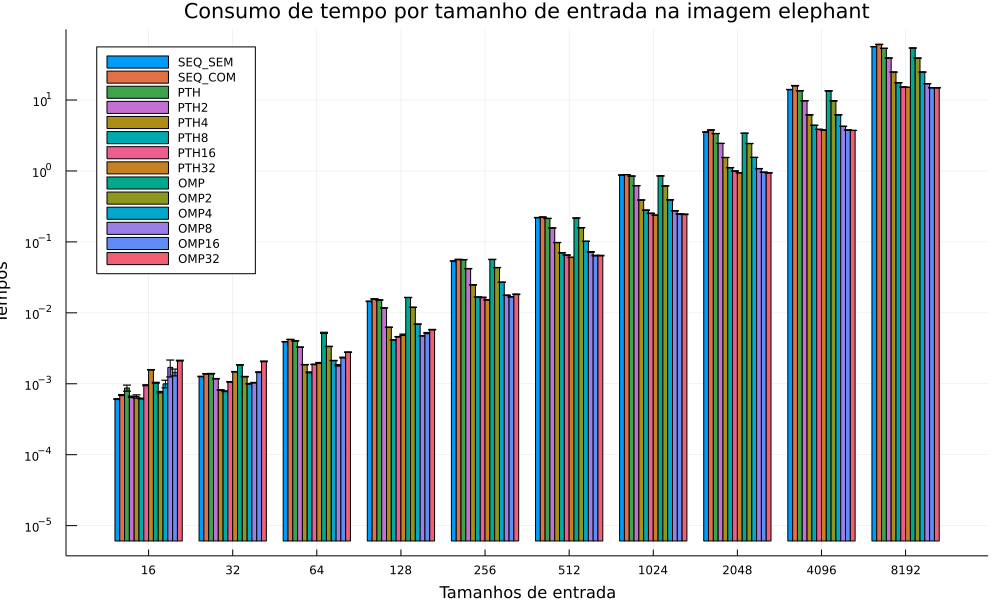

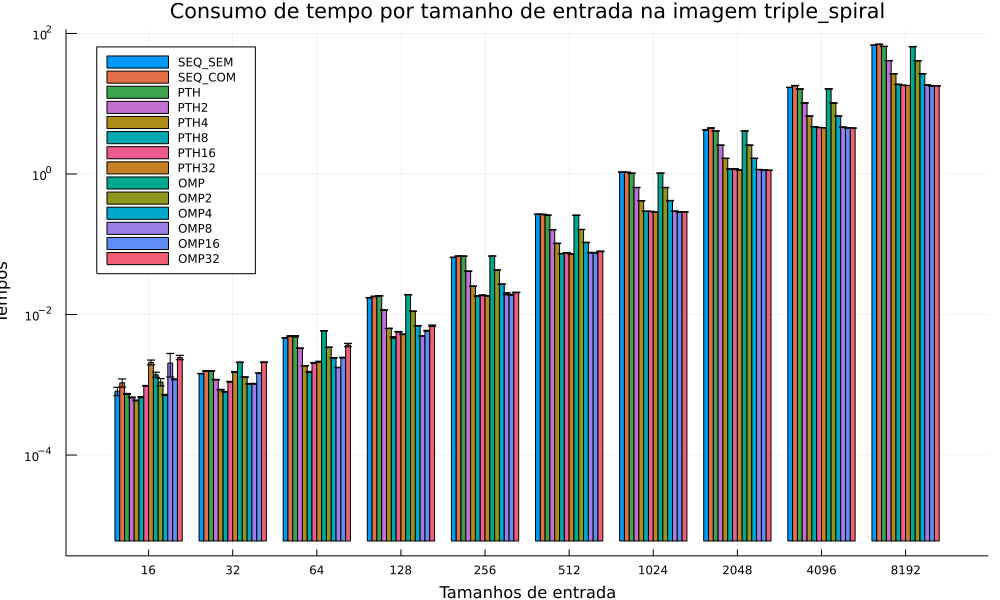

In [384]:
# plot error -> yerror

df = load_csv(path)

function create_graph_for_size(image)
    sort!(df, [:Imagem, :Tamanho, :Threads])

    selected = @from i in df begin
        @where i.Imagem==image
        @orderby i.Tamanho, descending(i.Programa)
        @select {i.Tamanho, i.Tempo, i.Desvio, i.Imagem, i.Threads, i.Programa}
        @collect DataFrame
    end

    times = convert(Array, selected[:, 2])
    desvios = convert(Array, selected[:, 3])
    yerror = []
    for desvio in desvios
        append!(yerror, confidence_interval(desvio))
    end
    labels = ["SEQ_SEM", "SEQ_COM"]
    for j in ["PTH", "OMP"]
        push!(labels, String(j))
        for i in ["2", "4", "8", "16", "32"]
          s = j*i
          push!(labels, s)  
        end

    end

    sx = CategoricalArray(repeat(labels, outer = 10))
    levels!(sx, labels)

    sizes = ["16", "32", "64", "128", "256", "512", "1024", "2048", "4096", "8192"]
    sizesx = CategoricalArray(repeat(sizes, inner = 14))
    levels!(sizesx, sizes)

    display(groupedbar(sizesx, times, group = sx, yerr=yerror, yaxis=:log,
            ylabel = "Tempos", xlabel = "Tamanhos de entrada", 
            title = "Consumo de tempo por tamanho de entrada na imagem "*image, size=(1000,600), legend=:topleft))
end

images = ["full", "seahorse", "elephant", "triple_spiral"]
for img in images
    create_graph_for_size(img)
end

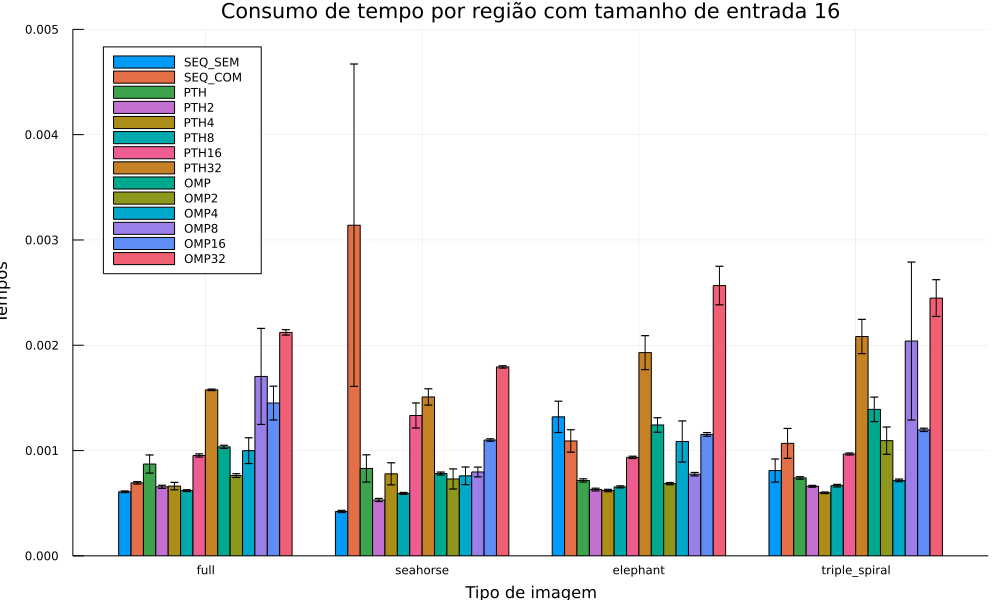

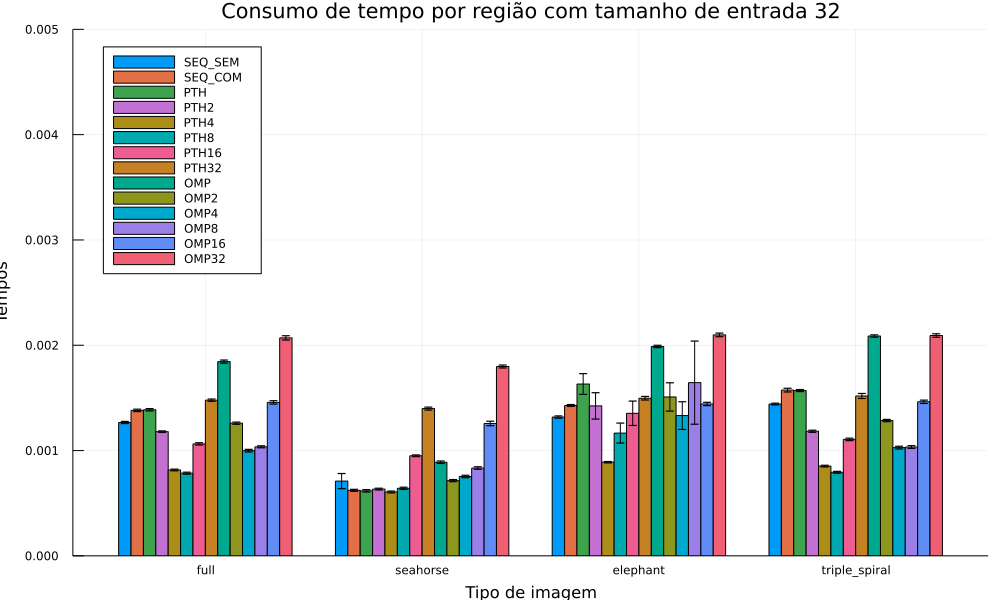

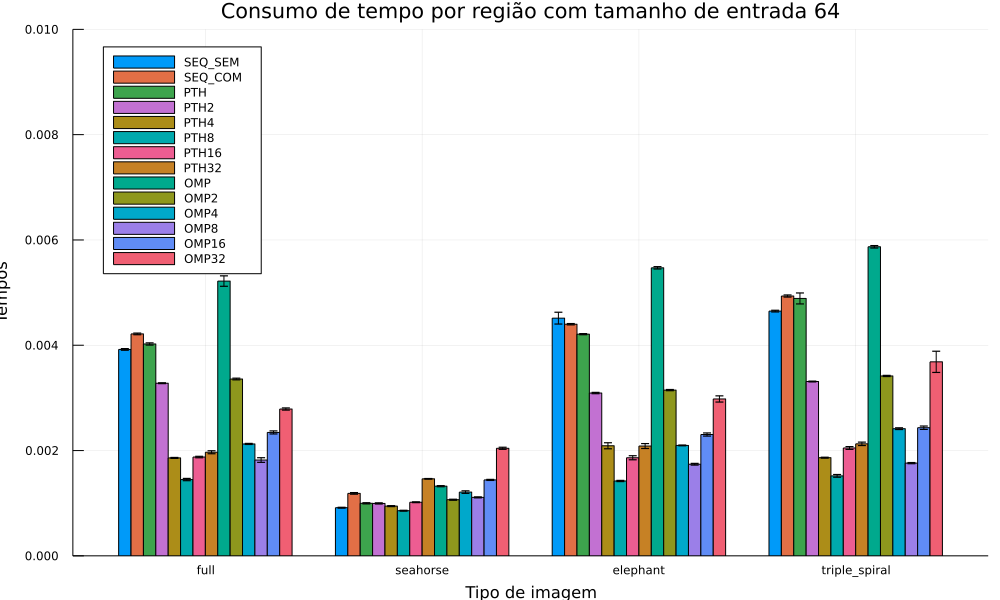

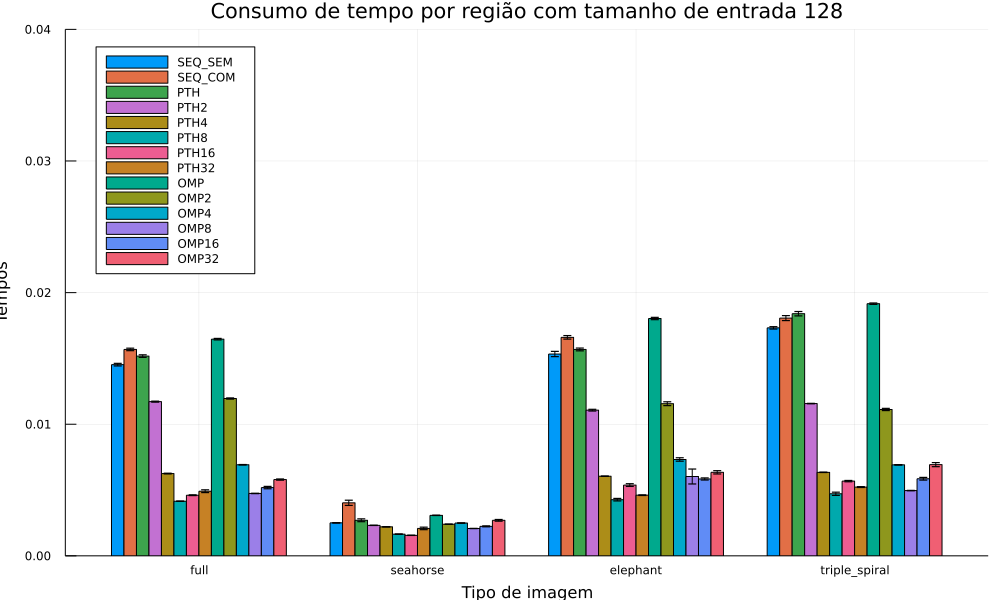

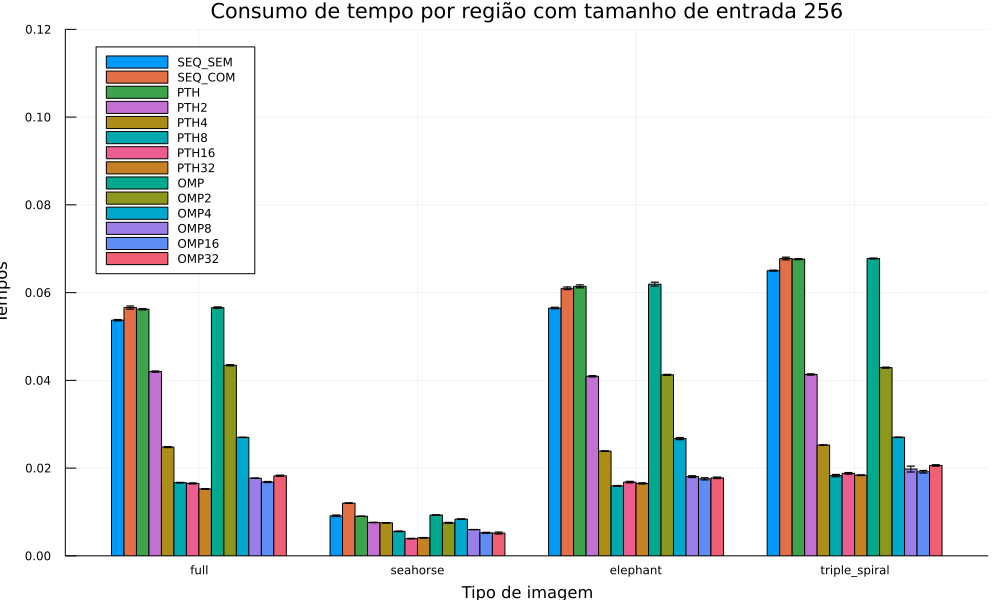

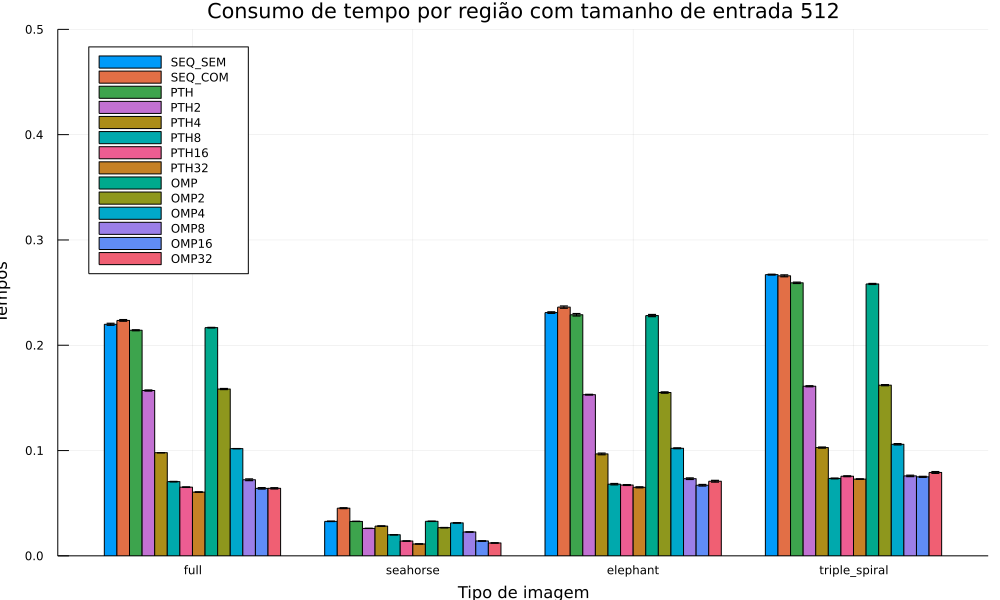

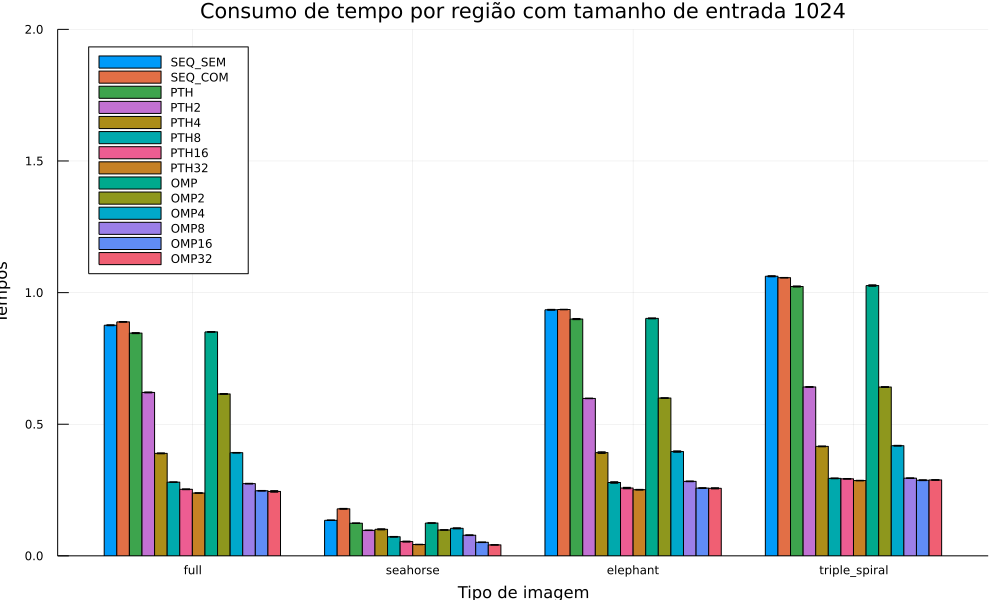

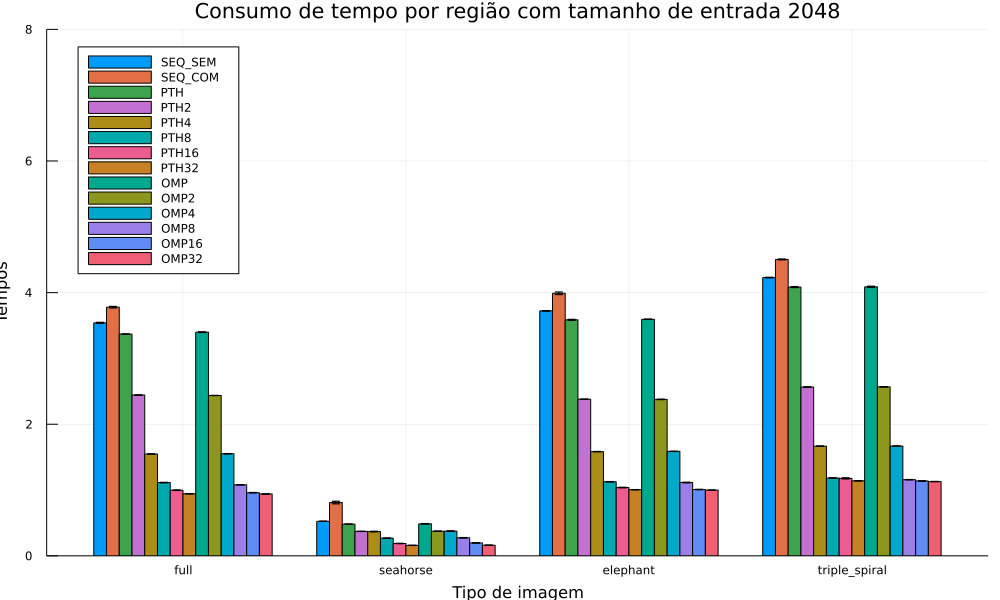

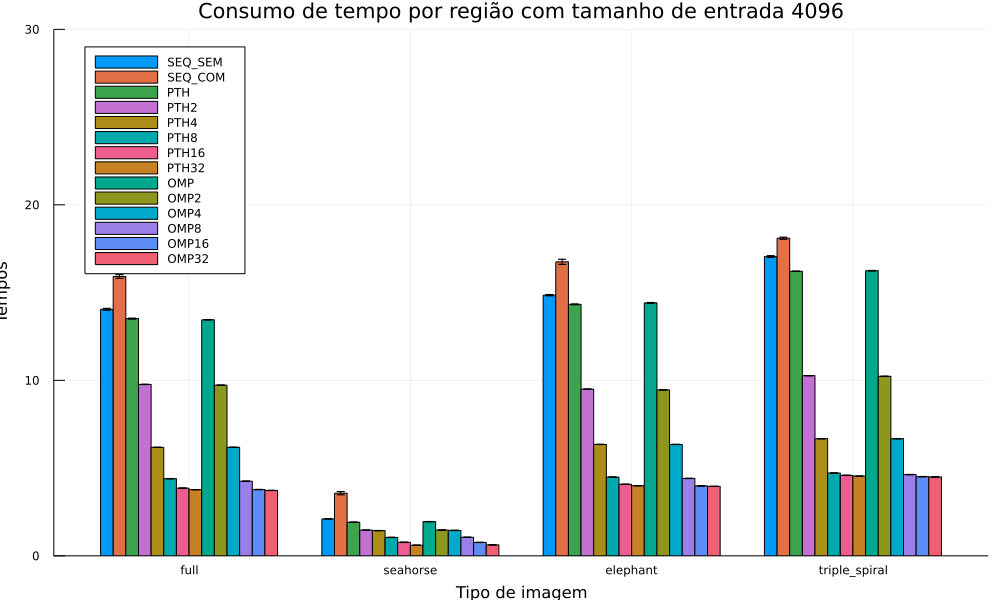

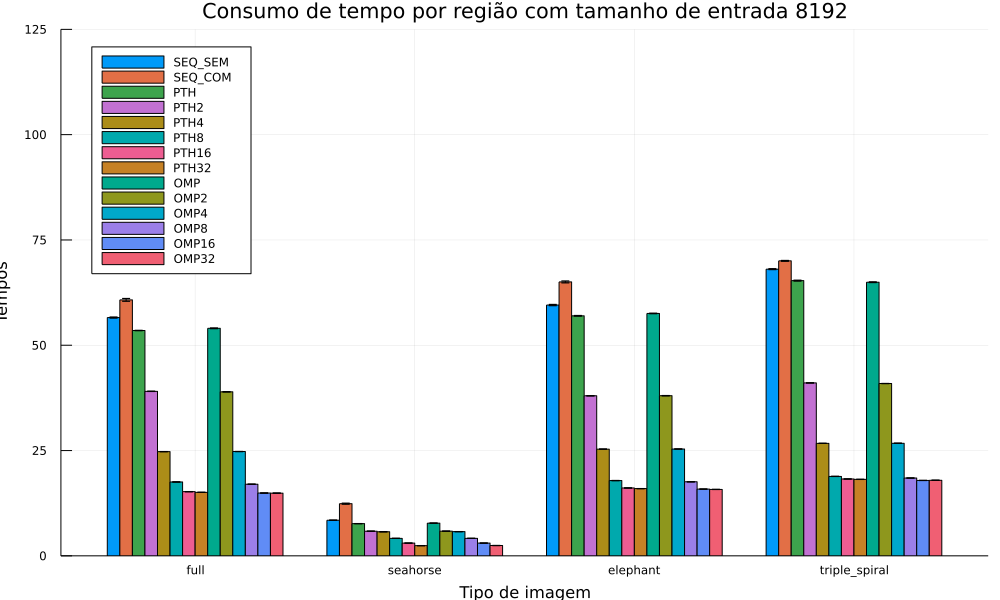

In [472]:
function create_graph_for_region(sz, lim)
    sort!(df, [:Imagem, :Tamanho, :Threads])
    selected = @from i in df begin
        @where i.Tamanho==sz
        @orderby i.Imagem, descending(i.Programa)
        @select {i.Tamanho, i.Tempo, i.Desvio, i.Imagem, i.Threads, i.Programa}
        @collect DataFrame
    end

    times = convert(Array, selected[:, 2])
    desvios = convert(Array, selected[:, 3])
    yerror = []
    for desvio in desvios
        append!(yerror, confidence_interval(desvio))
    end
    labels = ["SEQ_SEM", "SEQ_COM"]
    for j in ["PTH", "OMP"]
        push!(labels, String(j))
        for i in ["2", "4", "8", "16", "32"]
          s = j*i
          push!(labels, s)  
        end

    end

    sx = CategoricalArray(repeat(labels, outer = 4))
    levels!(sx, labels)

    sizes = ["full", "seahorse", "elephant", "triple_spiral"]
    sizesx = CategoricalArray(repeat(sizes, inner = 14))
    levels!(sizesx, sizes)
    display(groupedbar(sizesx, times, group = sx, yerr=yerror, 
            ylabel = "Tempos", xlabel = "Tipo de imagem", 
            title = "Consumo de tempo por região com tamanho de entrada "*string(sz),
            size=(1000,600), legend=:topleft, ylim=(0,lim)))
end
sizes = [16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
lims = [0.005, 0.005, 0.01, 0.04, 0.12, 0.5, 2, 8, 30, 125]

for i in 1:length(sizes)
    create_graph_for_region(sizes[i], lims[i])
end